# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 9:** Estudo de caso ENEM

# CADERNO DE EXERCÍCIOS - AULA 09

Utilizando as técnicas aprendidas até agora, analise os microdados do ENEM 2020 para responder às perguntas a seguir. Caso seja possível, gere visualizações apropriadas para cada uma delas.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
# Carregando o dataframe
# Encoding cp860 é o encoding para português. utf-8 não lê estes dados.
enem = pd.read_csv('http://dcc.ufmg.br/~flaviovdf/MICRODADOS_ENEM_2020_FILTRADOS.csv')

In [7]:
enem.head()

,NU_INSCRICAO,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_ANO_CONCLUIU,NU_NOTA_REDACAO,NU_NOTA_CN,TP_FAIXA_ETARIA,Q005,Q006,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_LC,TP_ESCOLA
0,200006271946,NaN,0,0,0,0,11,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,1
1,200001195856,NaN,1,1,1,1,11,580.0,604.1,11,NaN,NaN,711.3,661.7,595.3,1
2,200001943954,BA,0,0,0,0,0,NaN,NaN,4,3.0,B,NaN,NaN,NaN,2
3,200001908998,SP,1,1,1,1,0,760.0,620.8,2,NaN,NaN,759.4,675.0,624.2,2
4,200001634757,NaN,0,0,0,0,1,NaN,NaN,4,3.0,B,NaN,NaN,NaN,1


## 1. Quais os 5 estados brasileiros com maior taxa de ausência (geral) no ENEM 2020?


<ipython-input-8-7085c9af41a1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_ausencia.values, y=top5_ausencia.index, palette='viridis')


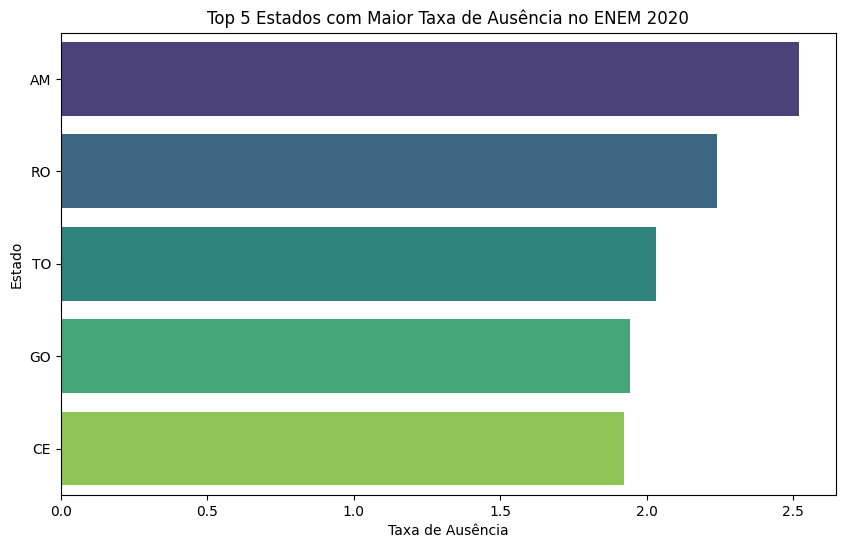

In [8]:
ausencia_por_estado = enem.groupby('SG_UF_ESC').apply(lambda x: (x[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']] == 0).sum().sum() / len(x))

top5_ausencia = ausencia_por_estado.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_ausencia.values, y=top5_ausencia.index, palette='viridis')
plt.title('Top 5 Estados com Maior Taxa de Ausência no ENEM 2020')
plt.xlabel('Taxa de Ausência')
plt.ylabel('Estado')
plt.show()

## 2. Como a probabilidade de um(a) candidato(a) obter nota superior a 600 na redação varia com o tempo desde que ele(a) concluiu o segundo grau? Esta tendência é a mesma observada em Ciências da natureza?

**Ovservação:** O valor da coluna TP_ANO_CONCLUIU já indica o tempo desde a conclusão até prova. Entretanto, o valor 0 não necessariamente indica que o estudante concluiu em 2020! Elimine este valor para análises mais precisas.

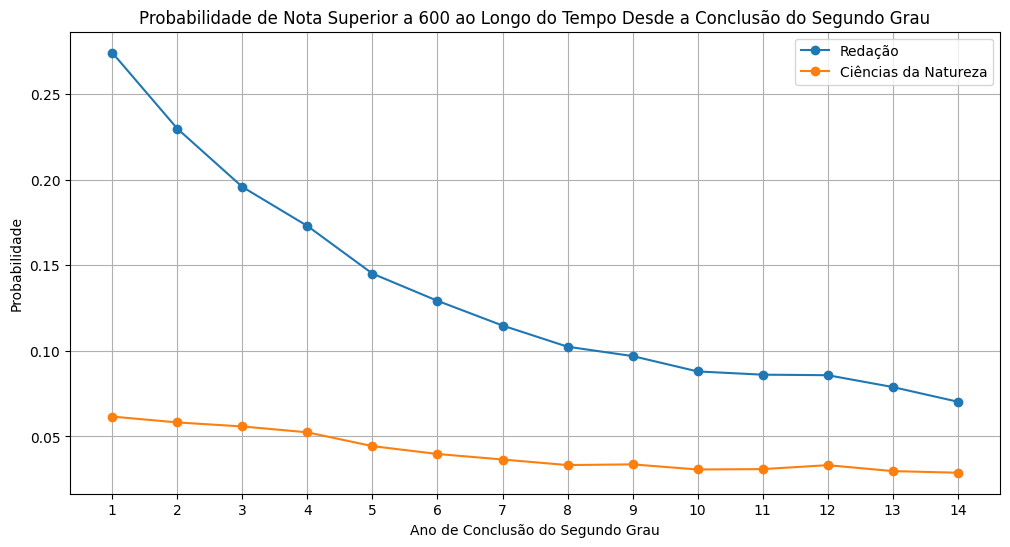

In [10]:
enem_df_filtrado = enem[enem['TP_ANO_CONCLUIU'] != 0]

redacao_probabilidade_por_ano = enem_df_filtrado.groupby('TP_ANO_CONCLUIU')['NU_NOTA_REDACAO'].apply(lambda x: (x > 600).mean())

cn_probabilidade_por_ano = enem_df_filtrado.groupby('TP_ANO_CONCLUIU')['NU_NOTA_CN'].apply(lambda x: (x > 600).mean())

plt.figure(figsize=(12, 6))
plt.plot(redacao_probabilidade_por_ano.index, redacao_probabilidade_por_ano.values, label='Redação', marker='o')
plt.plot(cn_probabilidade_por_ano.index, cn_probabilidade_por_ano.values, label='Ciências da Natureza', marker='o')
plt.title('Probabilidade de Nota Superior a 600 ao Longo do Tempo Desde a Conclusão do Segundo Grau')
plt.xlabel('Ano de Conclusão do Segundo Grau')
plt.ylabel('Probabilidade')
plt.xticks(redacao_probabilidade_por_ano.index)
plt.legend()
plt.grid(True)
plt.show()

## 3. Como fatores como renda (Q006), número de pessoas que moram na mesma residência que o candidato (Q005), e a faixa etária (TP_FAIXA_ETARIA) do participante influenciam em sua nota em Matemática?

**Sugestões:** Para análises mais precisas, elimine as notas 0 e os candidatos que faltaram nas provas analisadas (ex:TP_PRESENCA_MT=0). Como as notas são uma escala contínua, você pode optar, se preferir, por torná-la discreta, criando classes que englobem faixas de notas (ex: 200<NU_NOTA_MT<400).

Resposta: pela análise dos gráficos abaixo, a renda, o número de pessoas que moram na mesma residência que o candidato e a faixa etária tem grande influência na nota final em matemática.

OBS: optei por diminuir a quantidade de rendas para facilitar a visualização, mas o padrão de disposição dos boxplots é o mesmo.

<ipython-input-22-3349b46e193a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enem_df_filtrado['NU_NOTA_MT_CLASS'] = pd.cut(enem_df_filtrado['NU_NOTA_MT'], bins=bins, labels=labels, right=False)
<ipython-input-22-3349b46e193a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enem_df_filtrado['Q006'] = pd.Categorical(enem_df_filtrado['Q006'], categories=renda_classes, ordered=True)


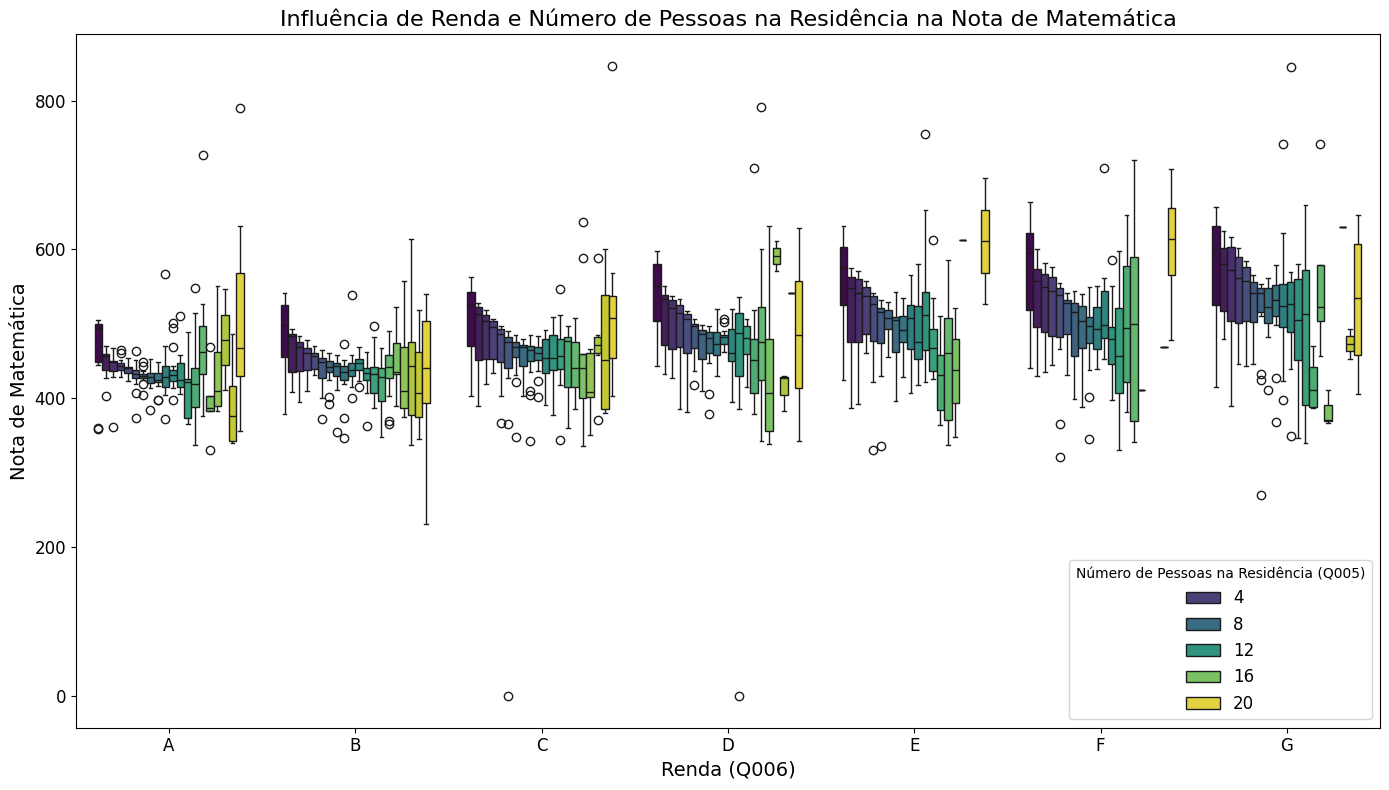

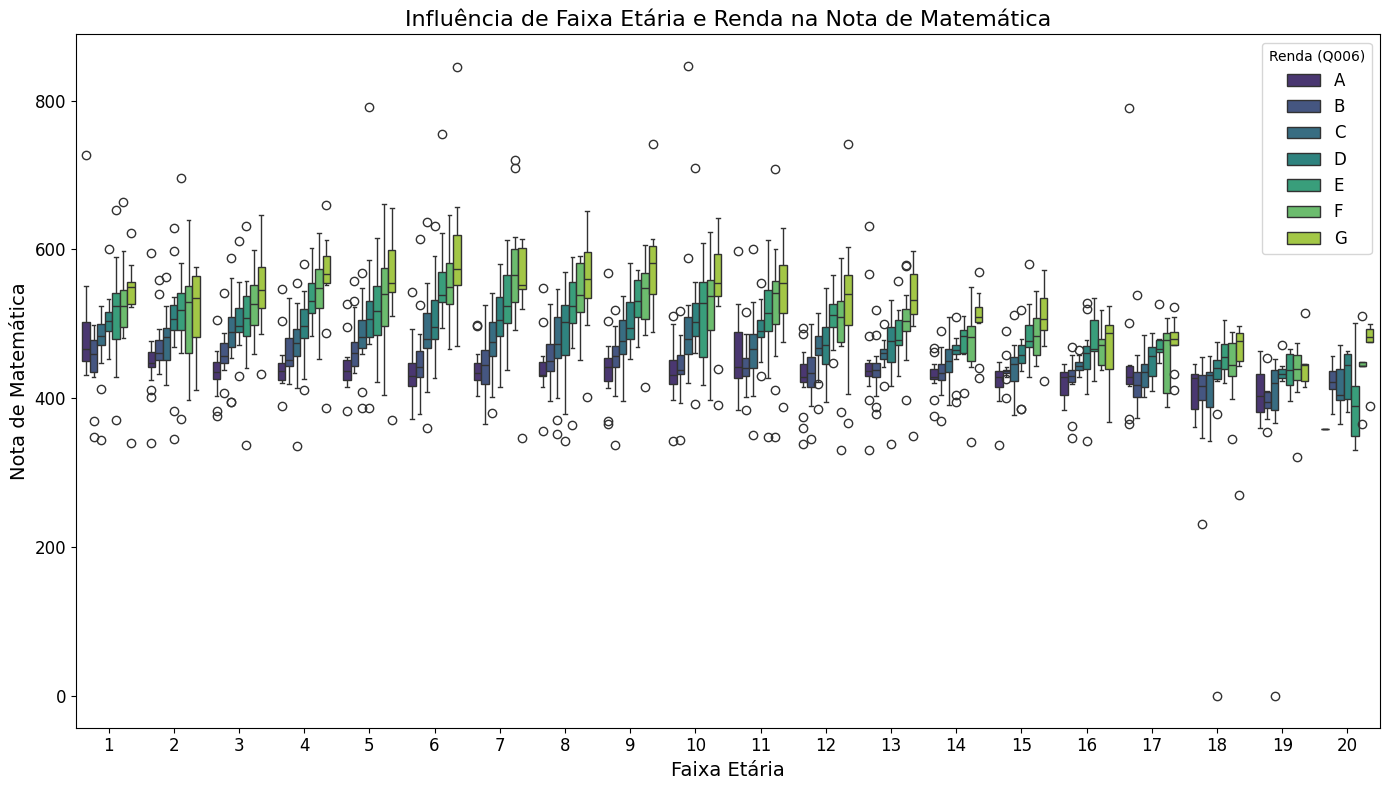

In [22]:
enem_df_filtrado = enem[(enem['NU_NOTA_MT'].notnull()) & (enem['TP_PRESENCA_MT'] == 1)]

bins = [0, 400, 600, 800, 1000]
labels = ['0-400', '401-600', '601-800', '801-1000']
enem_df_filtrado['NU_NOTA_MT_CLASS'] = pd.cut(enem_df_filtrado['NU_NOTA_MT'], bins=bins, labels=labels, right=False)

renda_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
enem_df_filtrado['Q006'] = pd.Categorical(enem_df_filtrado['Q006'], categories=renda_classes, ordered=True)

media_nota_mt = enem_df_filtrado.groupby(['Q006', 'Q005', 'TP_FAIXA_ETARIA'])['NU_NOTA_MT'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.boxplot(data=media_nota_mt, x='Q006', y='NU_NOTA_MT', hue='Q005', palette='viridis')
plt.title('Influência de Renda e Número de Pessoas na Residência na Nota de Matemática', fontsize=16)
plt.xlabel('Renda (Q006)', fontsize=14)
plt.ylabel('Nota de Matemática', fontsize=14)
plt.legend(title='Número de Pessoas na Residência (Q005)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=media_nota_mt, x='TP_FAIXA_ETARIA', y='NU_NOTA_MT', hue='Q006', palette='viridis')
plt.title('Influência de Faixa Etária e Renda na Nota de Matemática', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Nota de Matemática', fontsize=14)
plt.legend(title='Renda (Q006)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()